In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_C_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,NaN,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,NaN,564.0,0.0,2.0,160.0,NaN,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,NaN,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,NaN,4.0,128.0,263.0,0.0,0.0,105.0,NaN,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,NaN,2.0,120.0,NaN,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,NaN,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	20
float64		column 2	36
float64		column 3	29
float64		column 4	29
float64		column 5	29
float64		column 6	28
float64		column 7	31
float64		column 8	25
float64		column 9	30
float64		column 10	24
float64		column 11	12
float64		column 12	31
float64		column 13	27


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,250.000000,234.000000,241.000000,241.000000,241.000000,242.00000,239.000000,245.000000,240.000000,246.000000,258.000000,239.000000,243.000000
mean,0.676000,54.658120,3.178423,131.900415,249.771784,0.14876,0.979079,149.461224,0.337500,1.048780,1.585271,0.698745,4.691358
std,0.468939,8.918479,0.955963,18.049655,52.235383,0.35659,0.997677,23.313164,0.473845,1.115521,0.606784,0.970813,1.938999
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,214.000000,0.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,56.000000,3.000000,130.000000,245.000000,0.00000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,276.000000,0.00000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.00000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000


<AxesSubplot:>

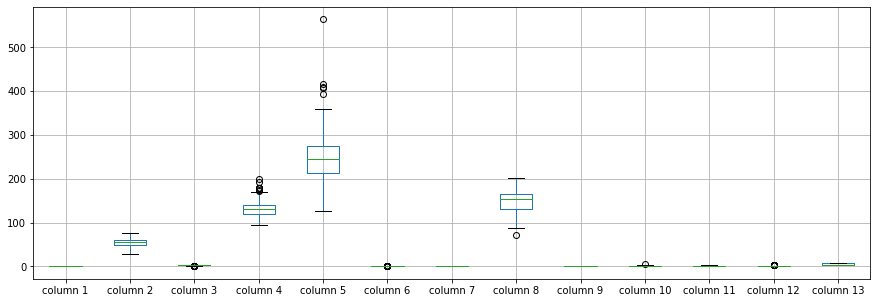

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.676000
column 2      54.658120
column 3       3.178423
column 4     131.900415
column 5     249.771784
column 6       0.148760
column 7       0.979079
column 8     149.461224
column 9       0.337500
column 10      1.048780
column 11      1.585271
column 12      0.698745
column 13      4.691358
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.091240,0.020233,-0.071287,-0.231304,0.086962,0.019375,-0.092515,0.196814,0.139755,0.025050,0.053168,0.397634
column 2,-0.091240,1.000000,0.069462,0.266189,0.227692,0.110679,0.075192,-0.365173,0.132312,0.170522,0.154197,0.345302,0.133025
column 3,0.020233,0.069462,1.000000,-0.034197,0.084036,-0.088092,0.041481,-0.299613,0.314170,0.160467,0.134099,0.201030,0.234261
column 4,-0.071287,0.266189,-0.034197,1.000000,0.209508,0.140515,0.110230,-0.034835,0.056805,0.219389,0.140601,0.107831,0.059041
column 5,-0.231304,0.227692,0.084036,0.209508,1.000000,0.038570,0.194534,-0.036001,0.069371,0.082925,-0.005092,0.143760,-0.017487
column 6,0.086962,0.110679,-0.088092,0.140515,0.038570,1.000000,0.058011,0.030495,0.014958,-0.055391,-0.011741,0.106281,0.053622
column 7,0.019375,0.075192,0.041481,0.110230,0.194534,0.058011,1.000000,-0.005621,0.059757,0.082143,0.126821,0.079231,-0.051041
column 8,-0.092515,-0.365173,-0.299613,-0.034835,-0.036001,0.030495,-0.005621,1.000000,-0.349869,-0.368878,-0.406029,-0.274448,-0.242443
column 9,0.196814,0.132312,0.314170,0.056805,0.069371,0.014958,0.059757,-0.349869,1.000000,0.341510,0.256583,0.171866,0.296316
column 10,0.139755,0.170522,0.160467,0.219389,0.082925,-0.055391,0.082143,-0.368878,0.341510,1.000000,0.632574,0.253761,0.339826


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+89,13+89+89,13+89+89+89,13+89+89+89+89,13+89+89+89+89+89,13+89+89+89+89,13+89+89+89,13+89+89,13+89,13], vae_layer = False, seed = 89)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 546.7847003936768
Epoch: 1 , loss: 545.8636627197266
Epoch: 2 , loss: 544.7445869445801
Epoch: 3 , loss: 548.2838497161865
Epoch: 4 , loss: 546.222074508667
Epoch: 5 , loss: 546.1230278015137
Epoch: 6 , loss: 547.9369850158691
Epoch: 7 , loss: 544.1157608032227
Epoch: 8 , loss: 545.1459293365479
Epoch: 9 , loss: 544.2779960632324
Epoch: 10 , loss: 543.6549987792969
Epoch: 11 , loss: 544.7356719970703
Epoch: 12 , loss: 545.0457000732422
Epoch: 13 , loss: 545.9658432006836
Epoch: 14 , loss: 540.5498485565186
Epoch: 15 , loss: 544.6235675811768
Epoch: 16 , loss: 541.0380249023438
Epoch: 17 , loss: 538.7201843261719
Epoch: 18 , loss: 535.9818077087402
Epoch: 19 , loss: 537.6860256195068
Epoch: 20 , loss: 534.8705558776855
Epoch: 21 , loss: 531.813606262207
Epoch: 22 , loss: 520.8637619018555
Epoch: 23 , loss: 494.61816215515137
Epoch: 24 , loss: 441.69933128356934
Epoch: 25 , loss: 419.33110427856445
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       3.225223
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     108.041779
column 9       0.000000
column 10      0.347457
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.000000,-12.971497,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,-35.816299,0.000000,0.0,0.000000,0.0,0.045641,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.930278,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,-51.072814,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.970511,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.985108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
266,0.0,-17.030491,0.000000,0.000000,-166.318741,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
267,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
268,0.0,0.000000,-1.663882,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1000.3629917241253, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.18474768913631093

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.056905
column 7       2.000000
column 8     186.000000
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.000000,4.000000,117.028503,322.000000,0.0,2.000000,109.0,0.000000,2.4,2.0,3.0,3.000000
1,0.0,67.000000,3.000000,79.183701,564.000000,0.0,2.000000,160.0,0.045641,1.6,2.0,0.0,7.000000
2,1.0,57.000000,2.000000,124.000000,261.000000,0.0,0.930278,141.0,0.000000,0.3,1.0,0.0,7.000000
3,1.0,12.927186,4.000000,128.000000,263.000000,0.0,0.000000,105.0,0.029489,0.2,2.0,1.0,7.000000
4,0.0,74.000000,2.000000,120.000000,269.000000,0.0,2.000000,121.0,1.000000,0.2,1.0,1.0,3.985108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,3.000000,172.000000,199.000000,1.0,0.000000,162.0,0.000000,0.5,1.0,0.0,7.000000
266,1.0,26.969509,2.000000,120.000000,96.681259,0.0,0.000000,173.0,0.000000,0.0,1.0,0.0,7.000000
267,0.0,56.000000,2.000000,140.000000,294.000000,0.0,2.000000,153.0,0.000000,1.3,2.0,0.0,3.000000
268,1.0,57.000000,2.336118,140.000000,192.000000,0.0,0.000000,148.0,0.000000,0.4,2.0,0.0,6.000000


In [20]:
imputations[-1].to_excel("Sheart_C_10(imp).xlsx", index=False, header=False)